In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

fixed = pd.read_csv(r"C:\Users\USER\PycharmProjects\component2_traffic\data\component2_traffic_adaptive.csv")
adaptive = pd.read_csv(r"C:\Users\USER\PycharmProjects\component2_traffic\data\component2_traffic_fixed.csv")

fixed["system"] = "Fixed-Time"
adaptive["system"] = "Adaptive"

df = pd.concat([fixed, adaptive], ignore_index=True)


In [5]:
df.head()

,vehicle_id,depart_time,arrival_time,duration,waiting_time,route_length,time_loss,system
0,0,0.0,68.0,68.0,0.0,863.15,7.87,Fixed-Time
1,1,2.0,439.0,437.0,238.0,2037.27,270.75,Fixed-Time
2,2,3.0,308.0,305.0,84.0,2705.54,122.55,Fixed-Time
3,3,5.0,290.0,285.0,77.0,2484.02,134.67,Fixed-Time
4,4,6.0,996.0,990.0,652.0,3612.18,747.86,Fixed-Time


In [6]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 3103 entries, 0 to 3102
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   vehicle_id    3103 non-null   int64  
 1   depart_time   3103 non-null   float64
 2   arrival_time  3103 non-null   float64
 3   duration      3103 non-null   float64
 4   waiting_time  3103 non-null   float64
 5   route_length  3103 non-null   float64
 6   time_loss     3103 non-null   float64
 7   system        3103 non-null   str    
dtypes: float64(6), int64(1), str(1)
memory usage: 194.1 KB


In [7]:
df.describe()

,vehicle_id,depart_time,arrival_time,duration,waiting_time,route_length,time_loss
count,3103.000000,3103.000000,3103.000000,3103.000000,3103.000000,3103.000000,3103.000000
mean,948.251047,1423.263616,1964.439897,541.176281,284.349017,2518.282143,344.713381
std,601.587062,902.659367,928.961265,445.460584,390.992288,1225.291904,413.147322
min,0.000000,0.000000,68.000000,8.000000,0.000000,30.930000,2.890000
25%,425.500000,639.000000,1181.000000,246.000000,24.000000,1582.925000,61.725000
50%,899.000000,1349.000000,1969.000000,423.000000,150.000000,2465.760000,211.660000
75%,1429.500000,2144.500000,2762.000000,700.000000,380.000000,3335.530000,463.115000
max,2338.000000,3507.000000,3599.000000,3497.000000,2945.000000,6643.030000,3086.480000


In [8]:
#checking missing values
df.isnull().sum()

vehicle_id      0
depart_time     0
arrival_time    0
duration        0
waiting_time    0
route_length    0
time_loss       0
system          0
dtype: int64

In [9]:
# Duplicate check
df.duplicated().sum()

np.int64(0)

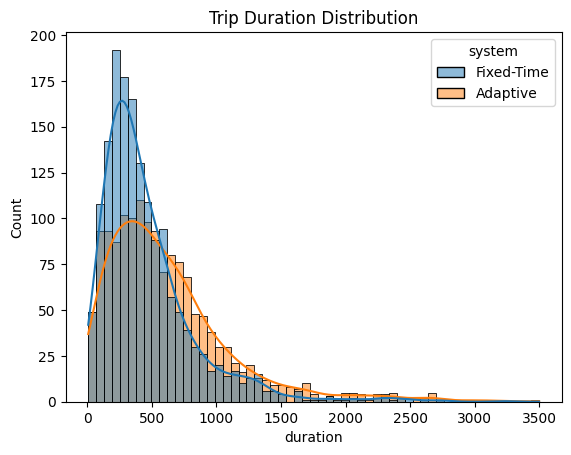

In [10]:
sns.histplot(data=df, x="duration", hue="system", kde=True)
plt.title("Trip Duration Distribution")
plt.show()


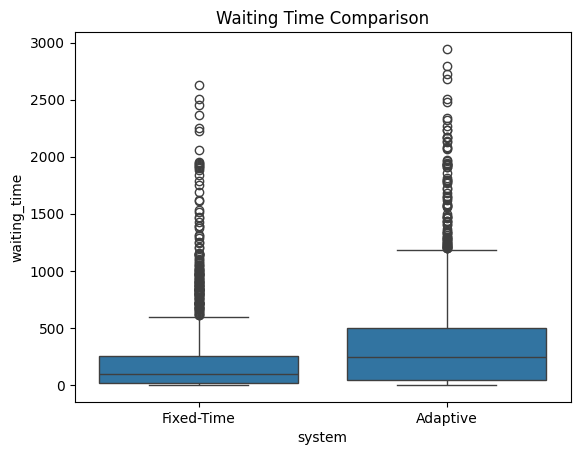

In [11]:
sns.boxplot(data=df, x="system", y="waiting_time")
plt.title("Waiting Time Comparison")
plt.show()


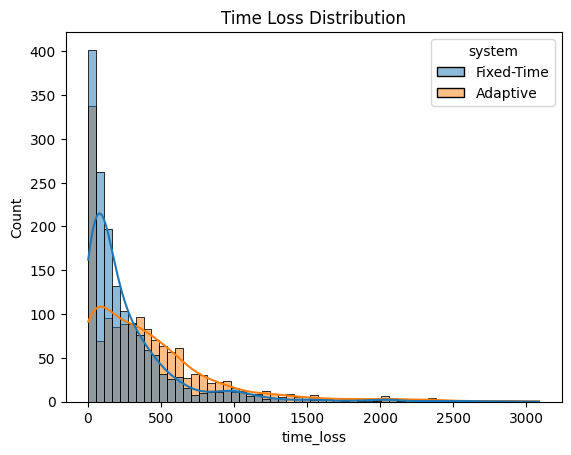

In [12]:
sns.histplot(data=df, x="time_loss", hue="system", kde=True)
plt.title("Time Loss Distribution")
plt.show()


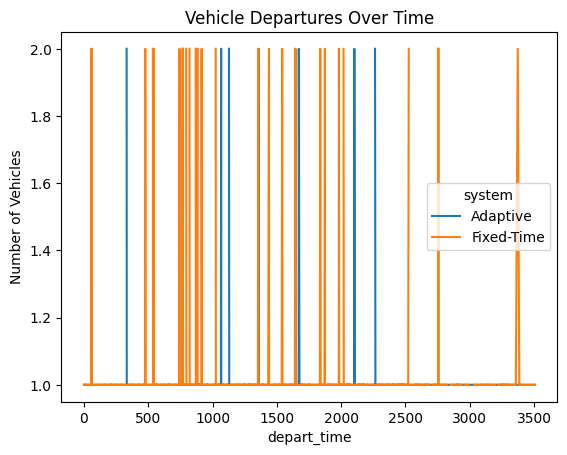

In [13]:
df.groupby(["system", "depart_time"]).size().unstack(0).plot()
plt.title("Vehicle Departures Over Time")
plt.ylabel("Number of Vehicles")
plt.show()
